# Class Activity - 3
### Group-8
### Prajwal Luitel (C0927658)
### Shishir Mishra (C0927250)
### Kowshigan Senthilrajah (C0925850)

#### In this class Activity, we are required to compare to the data from the previous class activity and:
 
#### 1. Compare your Activity 2 result with and without first scaling your dataset.

#### 2. Engineer a new feature and compare your Activity 2 results with and without this new feature.

#### 3. Use Dimension Reduction PCA to rank the importance of each feature and compare your Activity 2 result with a new model that uses only the features that contribute to 90% of the information in the dataset.

## Business Case Evaluation

#### Here, the data belongs to the stock prices of a company of a month from July 1 to July 29. There are various features in the dataset including date, adjusted close, stock price, expiration, strike, volume etc. From the available data, we can perform a predictive analysis on the mean price of the stock based upon the ask and bid price.

## Data Identification
#### In this case, the dataset has already been identified according to the business case evaluation. Now, we shall begin the analytics from step-3 of the lifecycle.

## Data Acquisition and Filtering

#### Importing the data and subjecting to automated filtering of the data (i.e. clearing the noise)

In [1]:
# Importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Reading the dataset using pandas library and creating a data frame
df = pd.read_csv("./data_download 1Jul2021_to_30Jul2021 (1).csv")
df.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,-1.0,0,1401,438.97,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,-1.0,0,1,438.97,NaN,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00220000,07/30/2021,220.0,P,A,0.01,...,-1.0,50,328,438.97,NaN,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00225000,07/30/2021,225.0,C,A,214.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0


In [2]:
#Displaying last 5 data in the dataframe
df.tail()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
221041,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00630000,12/15/2023,630.0,P,A,206.50,...,0.148305,0,1,430.26,*,-0.924500,0.750370,0.001112,-0.011128,-14.857175
221042,SPY,NYSEArca,07/01/2021,430.43,SPY 231215C00635000,12/15/2023,635.0,C,A,2.20,...,0.148310,0,146,430.26,NaN,0.051628,0.710649,0.001053,-0.005507,0.496773
221043,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00635000,12/15/2023,635.0,P,A,211.50,...,0.148310,0,0,430.26,*,-0.928176,0.710649,0.001053,-0.010792,-15.014119
221044,SPY,NYSEArca,07/01/2021,430.43,SPY 231215C00640000,12/15/2023,640.0,C,A,2.73,...,0.148310,5,1,430.26,*,0.048170,0.672488,0.000997,-0.005217,0.463973
221045,SPY,NYSEArca,07/01/2021,430.43,SPY 231215P00640000,12/15/2023,640.0,P,A,216.50,...,0.148310,0,0,430.26,*,-0.931634,0.672488,0.000997,-0.010467,-15.169052


In [3]:
# Looking at all the features in the data frame
df.columns

Index(['symbol', 'exchange', 'date', 'adjusted close', 'option symbol',
       'expiration', 'strike', 'call/put', 'style', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', '*', 'delta',
       'vega', 'gamma', 'theta', 'rho'],
      dtype='object')

In [4]:
# Checking for null values in the data frame
df.isna().sum()

symbol                     0
exchange                   0
date                       0
adjusted close             0
option symbol              0
expiration                 0
strike                     0
call/put                   0
style                      0
ask                        0
bid                        0
mean price                 0
iv                         0
volume                     0
open interest              0
stock price for iv         0
*                     192007
delta                      0
vega                       0
gamma                      0
theta                      0
rho                        0
dtype: int64

In [5]:
# Checking the dimensions of the data frame
df.shape

(221046, 22)

In [6]:
# Removing the null values and checking the dimensions
df.dropna(axis=1, inplace=True)
df.shape

(221046, 21)

In [7]:
df.columns

Index(['symbol', 'exchange', 'date', 'adjusted close', 'option symbol',
       'expiration', 'strike', 'call/put', 'style', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', 'delta', 'vega',
       'gamma', 'theta', 'rho'],
      dtype='object')

In [8]:
df.isna().sum()

symbol                0
exchange              0
date                  0
adjusted close        0
option symbol         0
expiration            0
strike                0
call/put              0
style                 0
ask                   0
bid                   0
mean price            0
iv                    0
volume                0
open interest         0
stock price for iv    0
delta                 0
vega                  0
gamma                 0
theta                 0
rho                   0
dtype: int64

## Data Aggregation and Representation
#### This process envolves the processing of features by aggregating (combining) of multiple features as per to meet the requirements of the model.

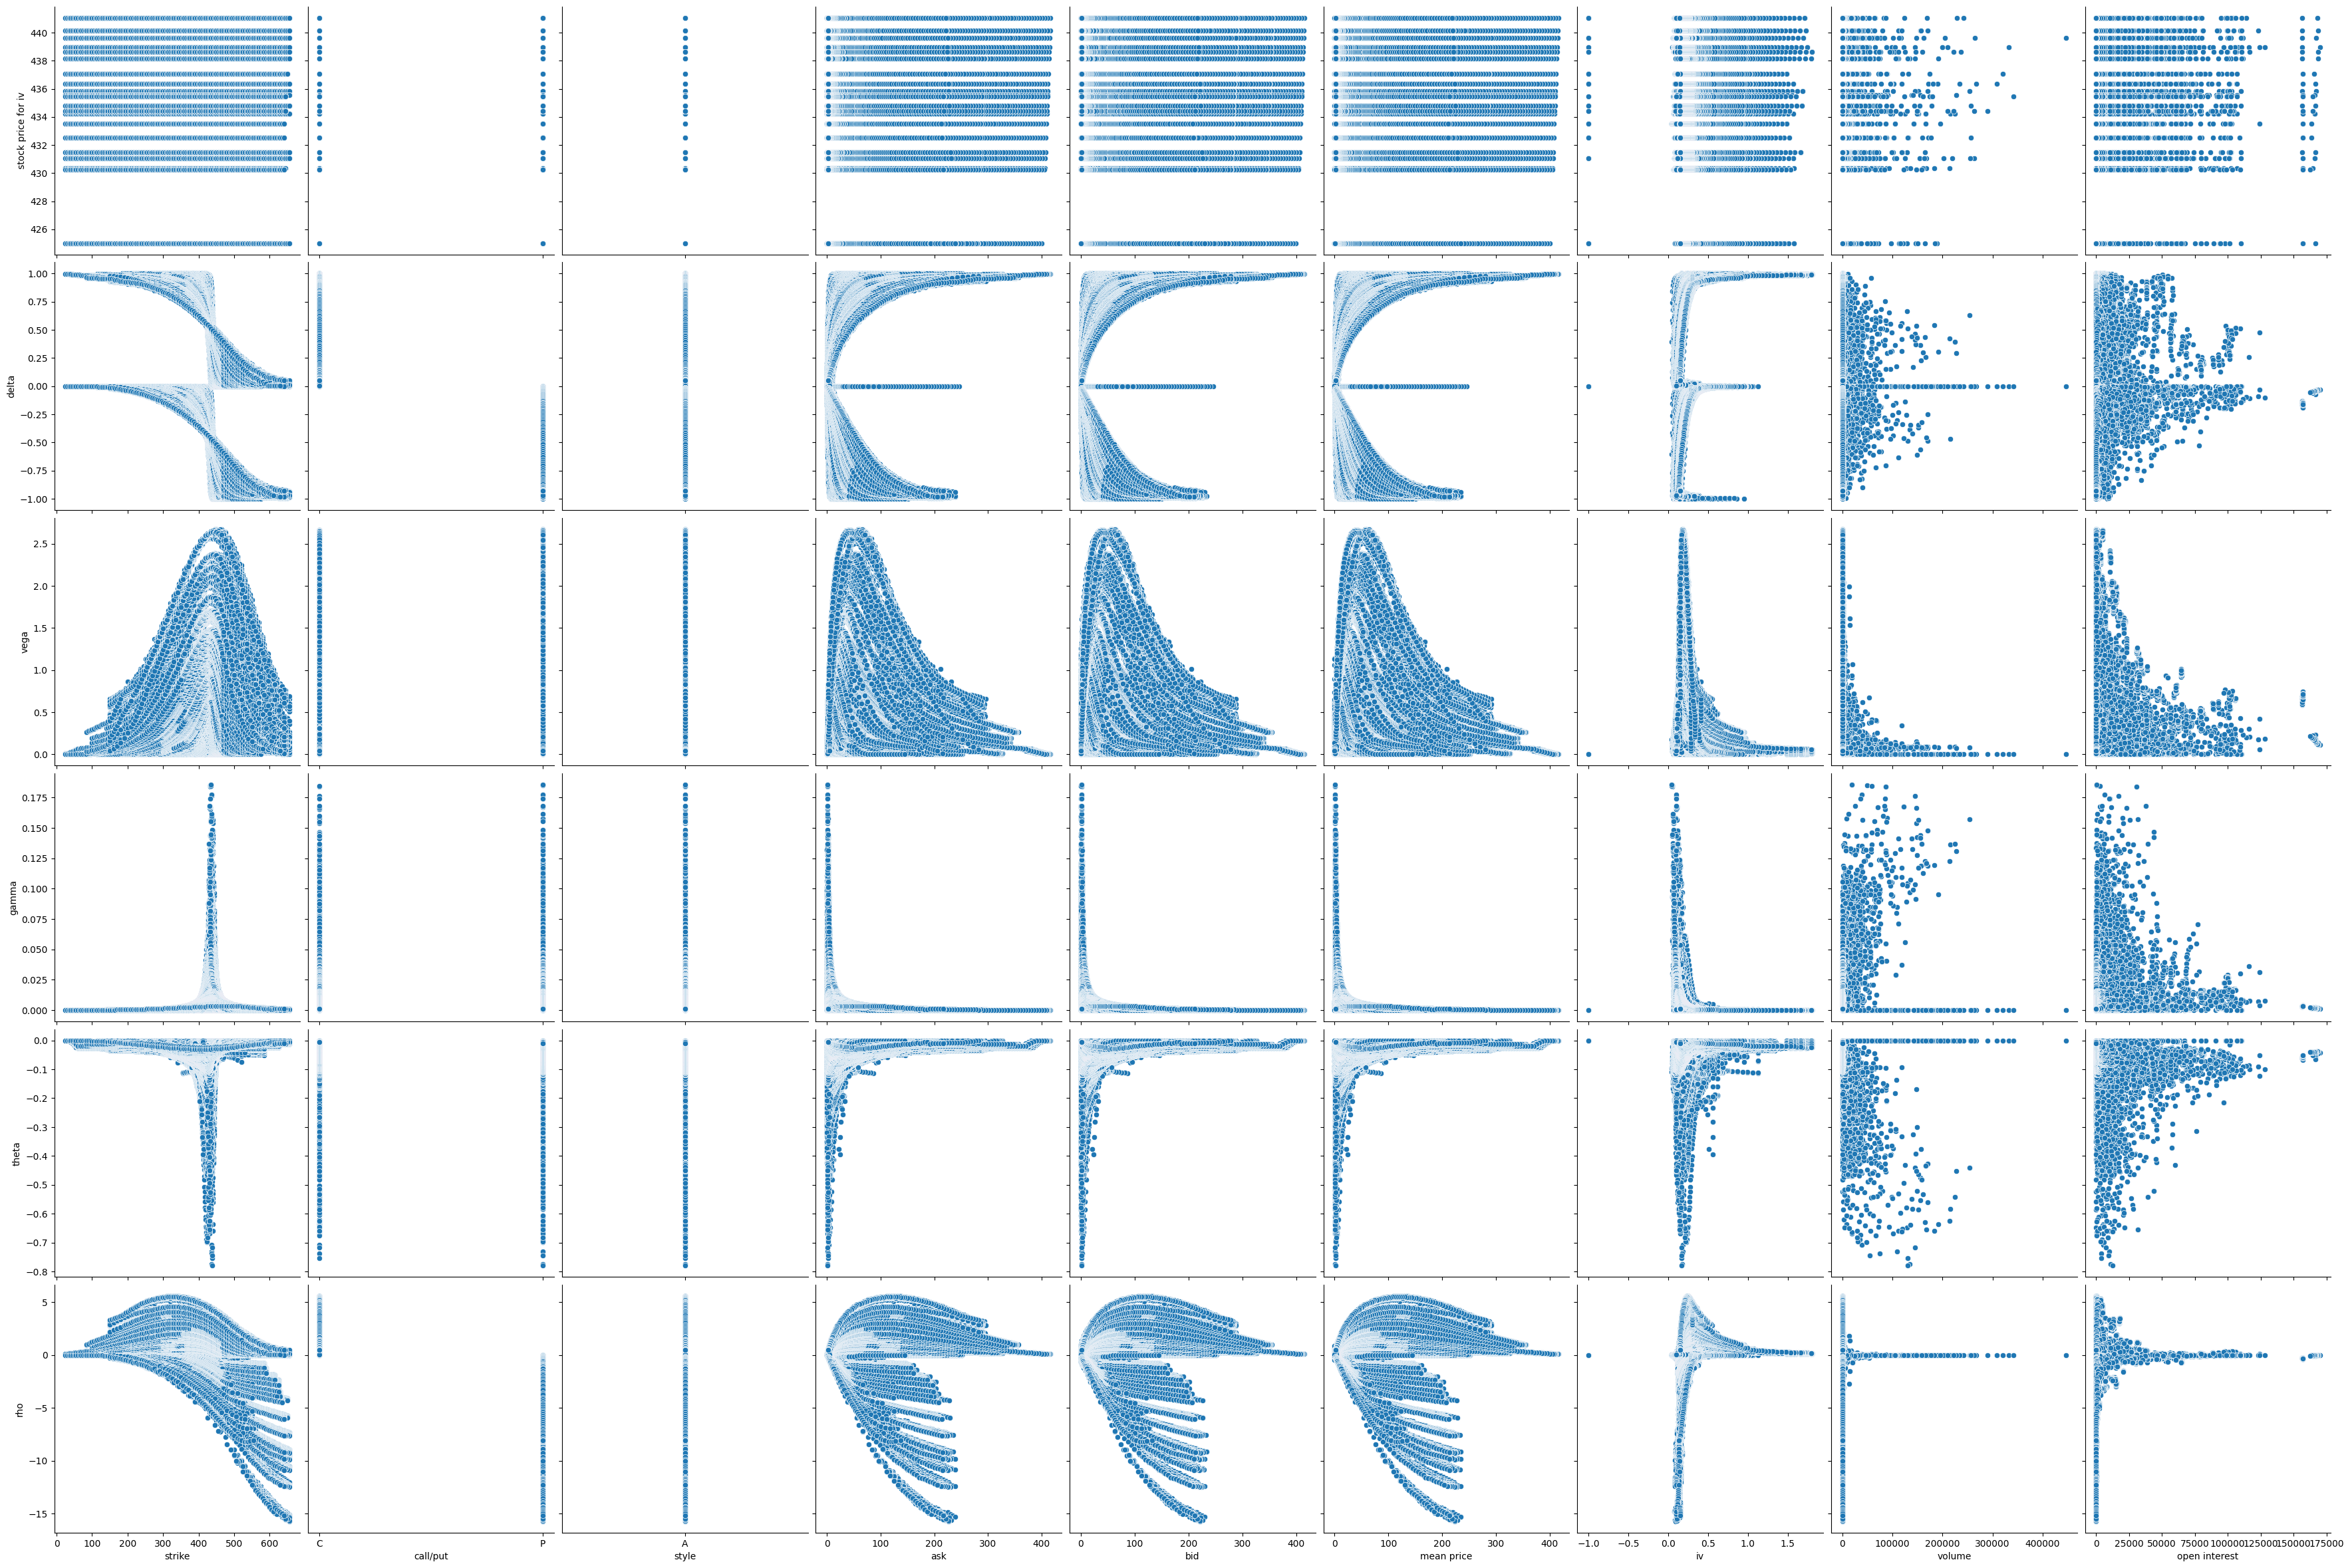

In [9]:
# # Plotting the values of the columns
sns.pairplot(df, x_vars=[ 'strike', 'call/put', 'style', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest' ], y_vars = ['stock price for iv', 'delta', 'vega',
       'gamma', 'theta', 'rho'], height = 4, kind = 'scatter' )

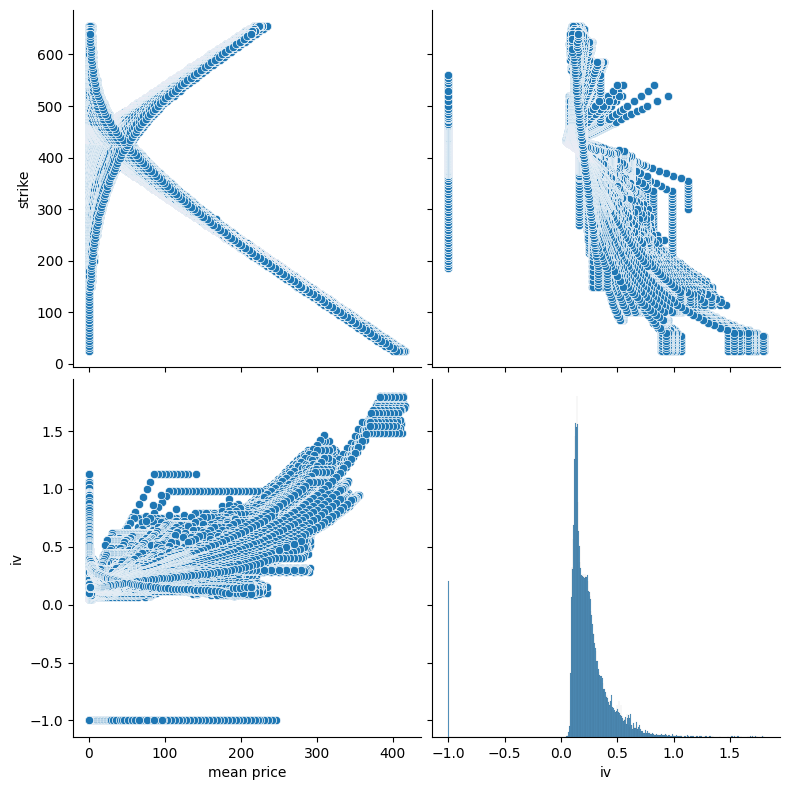

In [10]:
# Plotting the values of the columns
sns.pairplot(df, x_vars=[  'mean price', 'iv' ], y_vars = ['strike', 'iv' ], height = 4, kind = 'scatter' )

<Axes: >

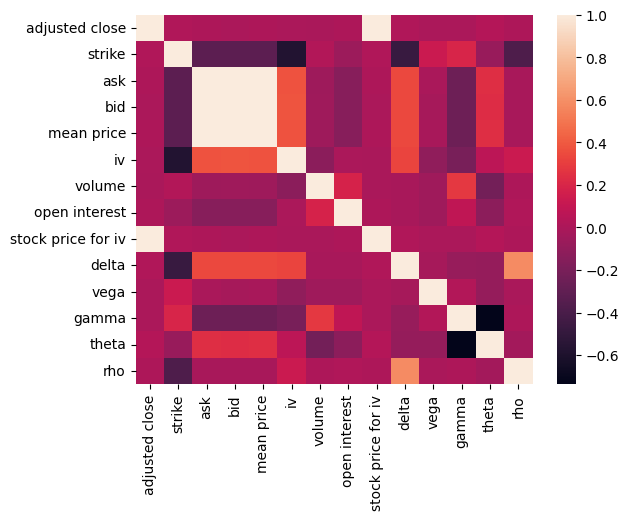

In [11]:
# Selecting numerical columns from all columns
columns_numerical = df.select_dtypes(include=['int64', 'float64']).columns

# Plotting the heatmap of the correlation of all numerical columns 
sns.heatmap(df[columns_numerical].corr())


## Data Analysis
#### This is the heart of data analytics and the most complex step of all. It involves building the model and applying the algorithm. Training and testing the model is done in this stage.

#### Linear Regression

In [12]:
#  Linear Regression

# Input variable selected which influences the mean price
input_variables = ['iv']
X = df[input_variables]
y = df['mean price']

# splitting the data into training and testing as per the provided requirement
X_train = df[df['date'] != '07/30/2021'][input_variables]
X_test = df[df['date'] == '07/30/2021'][input_variables]

y_train = df[df['date'] != '07/30/2021']['mean price']
y_test = df[df['date'] == '07/30/2021']['mean price']

# Fitting the linear regression model to the data
model = LinearRegression()
model.fit(X_train, y_train)

# Performing prediction on the testing data
y_pred = model.predict(X_test)

# Finding the mean squared error as a performance metric of the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  3214.7048418068644


## Data Visualization
#### This is the process of displaying the results of the analysis in a graphical format which can be understood by non-technical stakeholders as well.

Text(0, 0.5, 'mean price')

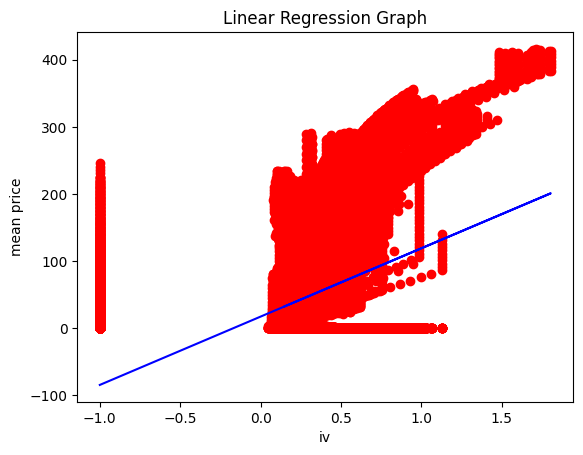

In [13]:
#Visualizing the results of linear regression
plt.scatter(X.iloc[:,0], y, color = 'red')
plt.plot(X.iloc[:,0], model.predict(X), color = 'blue') 
plt.title('Linear Regression Graph')
plt.xlabel('iv')
plt.ylabel('mean price')

In [14]:
# Displaying the dimensions of testing and training data
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(210320, 1)
(10726, 1)
(210320,)
(10726,)


## Revisiting the analysis with a different approach

#### Polynomial Regression

In [15]:
#  Polynomial Regression

# Selecting input variables and the target variables
input_variables = ['iv']
x = df[input_variables]
y = df['mean price']

# initializing the polynomial class to convert our input features to polynomial via the poly object
poly = PolynomialFeatures(degree=2, interaction_only=False)

# Split the data into training and testing sets according to provided condition
train_indices = df.index[df['date'] != '07/30/2021']
test_indices = df.index[df['date'] == '07/30/2021']

# Locating the data via indices
X_train = x.loc[train_indices]
X_test = x.loc[test_indices]

y_train = y.loc[train_indices]
y_test = y.loc[test_indices]

# Creating the polynomial and bias features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# Fitting the polynomial regression model to the training data
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluating the model's performance on the testing data by mean squared error
y_predict = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_predict)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2631.6213705443124


## Visualizing the new model 

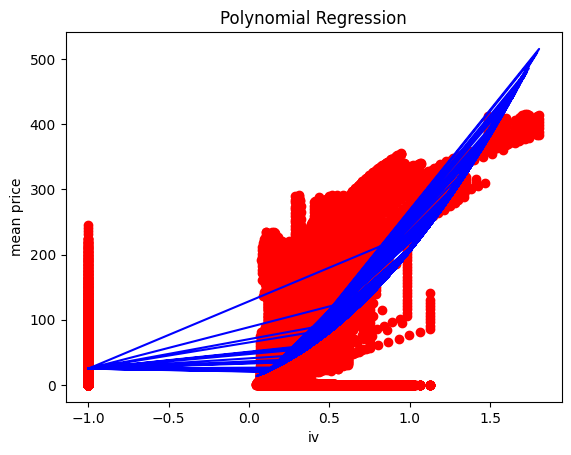

In [16]:
# Visualize the results
plt.scatter(x, y, color='red')
plt.plot(x, model.predict(poly.fit_transform(x)), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('iv')
plt.ylabel('mean price')
plt.show()

In [17]:
# Regression coefficients
print('Coefficients: ', model.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(model.score(X_test_poly, y_test)))


Coefficients:  [  0.          89.82422966 105.71815565]
Variance score: 0.2693438587269379


## Analysing the model with all the features as input variables

#### Linear Regression

In [18]:
# creating another data frame for another analysis process
df2 = df.copy()


# identifying all the numerical features as input variables while mean price remains the target value
input_variables = ['adjusted close',
        'strike', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', 'delta', 'vega',
       'gamma', 'theta', 'rho']
target_variable = "mean price"

X = df2[input_variables]
y = df2['mean price']

# Splitting the data into training and testing as per the required condition
X_train = df2[df2['date'] != '07/30/2021'][input_variables]
X_test = df2[df2['date'] == '07/30/2021'][input_variables]

y_train = df2[df2['date'] != '07/30/2021']['mean price']
y_test = df2[df2['date'] == '07/30/2021']['mean price']

# Fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the target value for the testing data
y_pred = model.predict(X_test)

# Calculating mean squared error for performance metric
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  2.693080649830778e-23


#### Polynomial Regression

In [19]:

input_variables = ['adjusted close',
        'strike', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', 'delta', 'vega',
       'gamma', 'theta', 'rho']

target_variable = "mean price"

x = df2[input_variables]
y = df2[target_variable]

# initializing the polynomial class to convert our input features to polynomial via the poly object
poly = PolynomialFeatures(degree=2, interaction_only=False)

# Splitting the data into training and testing sets according to the provided condition
train_indices = df2.index[df['date'] != '07/30/2021']
test_indices = df2.index[df['date'] == '07/30/2021']

# Locating the values based on indices
X_train = x.loc[train_indices]
X_test = x.loc[test_indices]

y_train = y.loc[train_indices]
y_test = y.loc[test_indices]


# Creating the polynomial and bias features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# Fitting the polynomial regression model to the training data
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluating the model's performance on the testing data
y_predict = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_predict)



print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.7342057095478265e-16


## 1. Scaling
#### Compare your Activity 2 result with and without first scaling your dataset.

In [20]:
#Transforming the data to the required format
scaler = StandardScaler()

features_to_scale = ["strike", "adjusted close", "ask", "bid", "mean price", "iv", "volume", "open interest", "stock price for iv", "delta", "vega", "gamma", "theta", "rho"]
scaler.fit(df[features_to_scale])

df[features_to_scale] = scaler.transform(df[features_to_scale])
df.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,0.88537,SPY 210730C00215000,07/30/2021,-1.960004,C,A,3.022788,...,3.034433,-5.479198,-0.079547,-0.274928,1.043213,-0.16686,-0.923857,-0.609148,1.05348,0.039104
1,SPY,NYSEArca,07/30/2021,0.88537,SPY 210730P00215000,07/30/2021,-1.960004,P,A,-0.688499,...,-0.686434,-5.479198,-0.079547,-0.042999,1.043213,-0.16686,-0.923857,-0.609148,1.05348,0.039104
2,SPY,NYSEArca,07/30/2021,0.88537,SPY 210730C00220000,07/30/2021,-1.906657,C,A,2.940149,...,2.951361,-5.479198,-0.079547,-0.274762,1.043213,-0.16686,-0.923857,-0.609148,1.05348,0.039104
3,SPY,NYSEArca,07/30/2021,0.88537,SPY 210730P00220000,07/30/2021,-1.906657,P,A,-0.688499,...,-0.686434,-5.479198,-0.069743,-0.220629,1.043213,-0.16686,-0.923857,-0.609148,1.05348,0.039104
4,SPY,NYSEArca,07/30/2021,0.88537,SPY 210730C00225000,07/30/2021,-1.853310,C,A,2.857511,...,2.868289,-5.479198,-0.079547,-0.274928,1.043213,-0.16686,-0.923857,-0.609148,1.05348,0.039104


#### Linear Regression

In [21]:
X = df[input_variables]
y = df['mean price']

# Splitting the data into training and testing as per the required condition
X_train = df[df['date'] != '07/30/2021'][input_variables]
X_test = df[df['date'] == '07/30/2021'][input_variables]

y_train = df[df['date'] != '07/30/2021']['mean price']
y_test = df[df['date'] == '07/30/2021']['mean price']

# Fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the target value for the testing data
y_pred = model.predict(X_test)

# Calculating mean squared error for performance metric
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  1.7466053492059683e-31


#### Polynomial Regression

In [22]:
x = df[input_variables]
y = df[target_variable]

# initializing the polynomial class to convert our input features to polynomial via the poly object
poly = PolynomialFeatures(degree=2, interaction_only=False)

# Splitting the data into training and testing sets according to the provided condition
train_indices = df.index[df['date'] != '07/30/2021']
test_indices = df.index[df['date'] == '07/30/2021']

# Locating the values based on indices
X_train = x.loc[train_indices]
X_test = x.loc[test_indices]

y_train = y.loc[train_indices]
y_test = y.loc[test_indices]


# Creating the polynomial and bias features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# Fitting the polynomial regression model to the training data
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluating the model's performance on the testing data
y_predict = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_predict)



print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6.484707813168717e-27


## 2. Feature Engineering
#### Engineer a new feature and compare your Activity 2 results with and without this new feature.

In [23]:
# Creating a new instance of dataframe to add new features to the dataset
df3 = df.copy()

df3.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,0.88537,SPY 210730C00215000,07/30/2021,-1.960004,C,A,3.022788,...,3.034433,-5.479198,-0.079547,-0.274928,1.043213,-0.16686,-0.923857,-0.609148,1.05348,0.039104
1,SPY,NYSEArca,07/30/2021,0.88537,SPY 210730P00215000,07/30/2021,-1.960004,P,A,-0.688499,...,-0.686434,-5.479198,-0.079547,-0.042999,1.043213,-0.16686,-0.923857,-0.609148,1.05348,0.039104
2,SPY,NYSEArca,07/30/2021,0.88537,SPY 210730C00220000,07/30/2021,-1.906657,C,A,2.940149,...,2.951361,-5.479198,-0.079547,-0.274762,1.043213,-0.16686,-0.923857,-0.609148,1.05348,0.039104
3,SPY,NYSEArca,07/30/2021,0.88537,SPY 210730P00220000,07/30/2021,-1.906657,P,A,-0.688499,...,-0.686434,-5.479198,-0.069743,-0.220629,1.043213,-0.16686,-0.923857,-0.609148,1.05348,0.039104
4,SPY,NYSEArca,07/30/2021,0.88537,SPY 210730C00225000,07/30/2021,-1.853310,C,A,2.857511,...,2.868289,-5.479198,-0.079547,-0.274928,1.043213,-0.16686,-0.923857,-0.609148,1.05348,0.039104


In [24]:
# Adding two new features in order to incorporate the categorical feature call/put into 1 and 0
df3['call'] = df3['call/put'].apply(lambda x: 1 if x == 'C' else 0)
df3['put'] = df3['call/put'].apply(lambda x: 1 if x == 'P' else 0)

# Dropping the call/put column as it is no longer needed
df3.drop(columns ='call/put', inplace=True)
df3.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,style,ask,bid,...,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho,call,put
0,SPY,NYSEArca,07/30/2021,0.88537,SPY 210730C00215000,07/30/2021,-1.960004,A,3.022788,3.045978,...,-0.079547,-0.274928,1.043213,-0.16686,-0.923857,-0.609148,1.05348,0.039104,1,0
1,SPY,NYSEArca,07/30/2021,0.88537,SPY 210730P00215000,07/30/2021,-1.960004,A,-0.688499,-0.684198,...,-0.079547,-0.042999,1.043213,-0.16686,-0.923857,-0.609148,1.05348,0.039104,0,1
2,SPY,NYSEArca,07/30/2021,0.88537,SPY 210730C00220000,07/30/2021,-1.906657,A,2.940149,2.962473,...,-0.079547,-0.274762,1.043213,-0.16686,-0.923857,-0.609148,1.05348,0.039104,1,0
3,SPY,NYSEArca,07/30/2021,0.88537,SPY 210730P00220000,07/30/2021,-1.906657,A,-0.688499,-0.684198,...,-0.069743,-0.220629,1.043213,-0.16686,-0.923857,-0.609148,1.05348,0.039104,0,1
4,SPY,NYSEArca,07/30/2021,0.88537,SPY 210730C00225000,07/30/2021,-1.853310,A,2.857511,2.878968,...,-0.079547,-0.274928,1.043213,-0.16686,-0.923857,-0.609148,1.05348,0.039104,1,0


#### Linear Regression

In [25]:

# Now, the call and put are two new features added to the input variables list
input_variables = ['adjusted close',
        'strike', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', 'delta', 'vega',
       'gamma', 'theta', 'rho', 'call', 'put' ]
target_variable = "mean price"

X = df3[input_variables]
y = df3['mean price']

# Splitting the data into training and testing as per the required condition
X_train = df3[df3['date'] != '07/30/2021'][input_variables]
X_test = df3[df3['date'] == '07/30/2021'][input_variables]

y_train = df3[df3['date'] != '07/30/2021']['mean price']
y_test = df3[df3['date'] == '07/30/2021']['mean price']

# Fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the outcome on the testing data
y_pred = model.predict(X_test)

# Calculating mean squared error for prediction as a metric
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  4.614191114129747e-30


#### Polynomial Regression

In [26]:
# The input variables
input_variables = ['adjusted close',
        'strike', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', 'delta', 'vega',
       'gamma', 'theta', 'rho']

target_variable = "mean price"

x = df3[input_variables]
y = df3[target_variable]

# initializing the polynomial class to convert our input features to polynomial via the poly object
poly = PolynomialFeatures(degree=2, interaction_only=False)

# Split the data into training and testing sets according to your condition
train_indices = df3.index[df['date'] != '07/30/2021']
test_indices = df3.index[df['date'] == '07/30/2021']

# Locating the data by indices
X_train = x.loc[train_indices]
X_test = x.loc[test_indices]

y_train = y.loc[train_indices]
y_test = y.loc[test_indices]


# Create the polynomial and bias features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# Fit the polynomial regression model to the training data
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Evaluate the model's performance on the testing data
y_predict = model.predict(X_test_poly)
mse = mean_squared_error(y_test, y_predict)


# Calculating the mean squared error for performance metric
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6.484707813168717e-27


## 3. Use Dimension Reduction PCA to rank the importance of each feature and compare your Activity 2 result with a new model that uses only the features that contribute to 90% of the information in the dataset.

#### Linear Regression

In [27]:
from sklearn.decomposition import PCA

pca=PCA(0.90)

input_variables = ['adjusted close',
        'strike', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', 'delta', 'vega',
       'gamma', 'theta', 'rho', 'call', 'put']

target_variable = "mean price"

x = df3[input_variables]
y = df3[target_variable]

# fitting into pca
X_pca = pca.fit_transform(x)

# Splitting the data into training and testing sets according to provided condition
train_indices = df3.index[df['date'] != '07/30/2021']
test_indices = df3.index[df['date'] == '07/30/2021']

# Locating the data by indices
X_train = X_pca[train_indices]
X_test = X_pca[test_indices]

y_train = y.loc[train_indices]
y_test = y.loc[test_indices]

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model's performance on the testing data
y_predict = model.predict(X_test)
mse = mean_squared_error(y_test, y_predict)

print(f"PCA Explained Variance ratio: {pca.explained_variance_ratio_}")
# Calculating the mean squared error for performance metric
print(f'Mean Squared Error: {mse}')

PCA Explained Variance ratio: [0.27285422 0.13903463 0.13759184 0.10871986 0.08579552 0.06805407
 0.06386331 0.05020833]
Mean Squared Error: 0.00822852404886514


#### Polynomial Regression

In [28]:
input_variables = ['adjusted close',
        'strike', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', 'delta', 'vega',
       'gamma', 'theta', 'rho']

target_variable = "mean price"

x = df3[input_variables]
y = df3[target_variable]

# initializing the polynomial class to convert our input features to polynomial via the poly object
pca=PCA(0.90)
poly = PolynomialFeatures(degree=2, interaction_only=False)
# Split the data into training and testing sets according to your condition
train_indices = df3.index[df['date'] != '07/30/2021']
test_indices = df3.index[df['date'] == '07/30/2021']


# fitting into pca
X_pca = pca.fit_transform(x)

# Splitting the data into training and testing sets according to provided condition
train_indices = df3.index[df['date'] != '07/30/2021']
test_indices = df3.index[df['date'] == '07/30/2021']

# Locating the data by indices
X_train = X_pca[train_indices]
X_test = X_pca[test_indices]

y_train = y.loc[train_indices]
y_test = y.loc[test_indices]


X_train_pca_poly = poly.fit_transform(X_train)
X_test_pca_poly = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_pca_poly, y_train)

# Evaluate the model's performance on the testing data
y_predict = model.predict(X_test_pca_poly)
mse = mean_squared_error(y_test, y_predict)


# Calculating the mean squared error for performance metric
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0004280960335684316


## 1. Following the initial step of data acquisition and filtering, data was aggregated by combining multiple features.
#### Thereafter, data analysis was done without performing scaling on the dataset. This includes linear regression and polynomial regression and the visualization of them. 

#### * Linear Regression:
#### Mean Squared Error:  3214.7048418068644

#### * Polynomial Regression:
#### Mean Squared Error: 2631.6213705443124

## 2. Next, dataset was scaled and then linear and polynomial regression were done on the newly scaled dataset to be compared with the first.
#### * Linear Regression:
#### Mean Squared Error:  1.7466053492059683e-31

#### * Polynomial Regression:
#### Mean Squared Error: 6.484707813168717e-27

## 3. Next, new sets of features were introduced to the dataset as below.

#### Again, linear and polynomial regressions were done on the new dataset and the results are:

#### * Linear Regression:
#### Mean Squared Error:  4.614191114129747e-30

#### * Polynomial Regression:
#### Mean Squared Error: 6.484707813168717e-27

## 4. Lastly, the Dimension Reduction PCA was used to reduce the dimension of the large dataset used. The results of this analysis are as follows.

#### * Linear Regression:
#### PCA Explained Variance ratio: [0.27285422 0.13903463 0.13759184 0.10871986 0.08579552 0.068054070.06386331 0.05020833]
#### Mean Squared Error: 0.00822852404886514

#### * Polynomial Regression
#### Mean Squared Error: 0.0004280960335684316